# Energy Services

What types of electricity services are available to the household?

In [5]:
import os,sys
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk
import mtf
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Tw Cen MT"
plt.rcParams.update({'font.size': 20})

fondesurco = hedera.mfi(2)
odk_data_dir = '../../_datasets/DataODK/'
odk_survey_folder = ['PEPI_19_03_19/','PEPI_FONDESURCO_19_04_17/']
odk_data_name = [odk_data_dir + odk_survey_folder[0] + 'PEPI_results.csv',
                 odk_data_dir + odk_survey_folder[1] + 
                 'PEPI_FONDESURCO_2_results.csv']
fondesurco.gpsFile = '../../_datasets/Fondesurco/HederaGPS/All.txt'
fondesurco.data_client_file = '../../_datasets/Fondesurco/ClientDatabases/data_with_GPS_3.csv'
data = fondesurco.read_survey(odk_data_name)
fondesurco.HH = odk.households(data)

## MTF Ranking (Electricity Services)

According to the devices available and used in the household, 
these are classified following the MTF evaluation matrix.

The applications found in the field reflect the limited use of electrical services used in the region. Most households are characterized by low electricity consumption. A quarter of the sample, in addition to communication and entertainment devices, also has appliances such as the iron and blender with the highest energy consumption. Only 4 households reported having electric showers to heat the water when bathing.


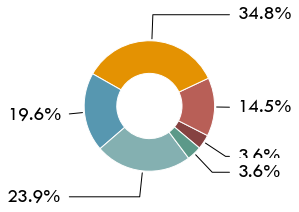

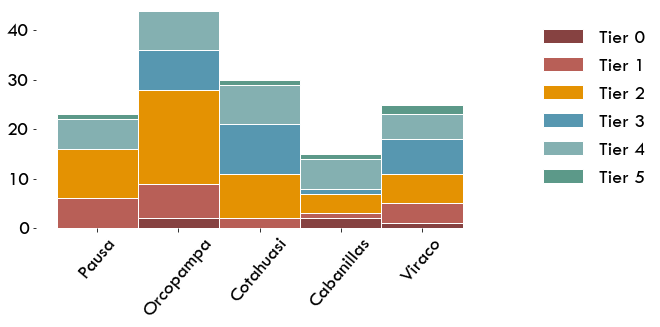

In [6]:

fondesurco.tier_plots('E_Services',legend=True)


## Appliances
 
Almost 50% of households only have cell phones, lighting, radio and television.

After lighting and cell phones, more than half of households have a color television and radio. Appliances that facilitate household chores such as the washing machine or dishwasher were of minimal occurrence. Less than 20% use refrigerators, found in all offices in a similar proportion, who after the iron and the blender, are the appliances most frequently found in the field. The two cases of households using candles, did not have any application powered by another source of energy. The perception of households with respect to the devices that consume the most indicated that televisions (55%), refrigerators (15%), and radios (10%), are those that, according to their perception, most affect the receipts of light.

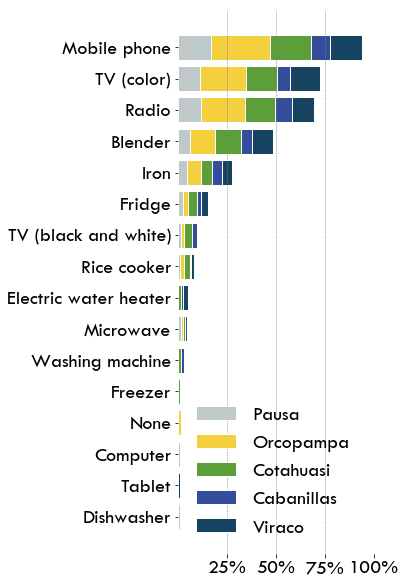

In [7]:
[appliances_per_x,u_id] = odk.compute_appliances_per_x(data,fondesurco.HH,fondesurco.offices,'locality')
odk.plot_appliances_per_x(len(fondesurco.HH),appliances_per_x,u_id,'locality',
                          fondesurco.offices,
                          figPath=None,c=fondesurco.office_color)

## Services vs. Income

The level of income and the consumption of electricity are correlated.

With higher income, households have more appliances and more power, unlike households in the lowest income quintiles that reported fewer appliances.

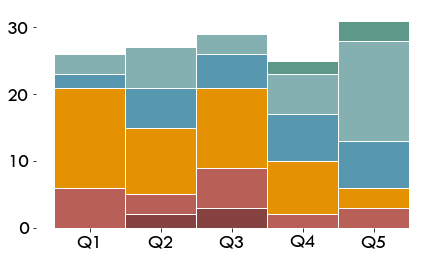

In [8]:
odk.plot_tiers_per_quintile(fondesurco.HH,'E_Services',figPath=None)